In [2]:
import os
import re

import shutil
import codecs, json 
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import sklearn as sk
import time
from dypac import Dypac
import nilearn
from nilearn import image, plotting, datasets
from nilearn.input_data import NiftiLabelsMasker, NiftiMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.decomposition import DictLearning, CanICA
from scipy.stats import pearsonr
import nilearn.plotting as plotting


In [3]:
import hcp_utils as hcp

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


# Extract zip files and delete the original zip files

In [3]:
import os, zipfile

#dir_name = '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/data_RS_denoised'
dir_name = '/mnt/d/Liz_HCP/data'
extension = ".zip"

os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(dir_name) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # delete zipped file

In [16]:
#dir_name = '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/data_RS_denoised'

subjects = os.listdir(dir_name)

len(subjects)

9

# Load data & concatenate the 4 sessions - do it only once

In [17]:
# Define the path to 2D time series
#const_path1 = 'mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/data_RS_denoised' #0
const_path1 = '/mnt/d/Liz_HCP/data' #0
#subjects #1
const_path2 = 'MNINonLinear/Results/rfMRI_REST' #2
sessions = ['1_LR', '1_RL','2_LR','2_RL'] #3
const_path3 = '_Atlas_MSMAll_hp2000_clean.dtseries.nii'#4
data = []

In [18]:
saved_dir_path = '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/saved_data/'


#obj_text = codecs.open(savedFile_path, 'r', encoding='utf-8').read()
#data = json.loads(obj_text)

#for key in data.keys():
 #   data[key] = np.array(data[key])

 
#Loop over each subject and each session per subject
for sub in subjects:
    #if sub in data.keys():
     #   continue
    tmp_dict = {}
    for session in sessions:
        path = '/{0}/{1}/{2}{3}/rfMRI_REST{3}{4}'.format(const_path1, sub, const_path2, session,const_path3)
        #load data per session
        img = nib.load(path)
        X = img.get_fdata()
        #print(stats.describe(X))
        #print(np.mean(X))
        #print(X.shape)
        #print(type(X.shape))
        if X.shape[0] != 1200:
            print("bad subject")
        Xn = hcp.normalize(X) #normalize data per session
        #print(np.mean(Xn))
        #print(stats.describe(Xn))
        tmp_dict[session] = Xn
        #tmp_dict[session] = '/{0}/{1}/{2}{3}/rfMRI_REST{3}{4}'.format(const_path1, sub, const_path2, session,const_path3)
    #Concatenate 4 normalized sessions per subject
    data_sub = np.concatenate((tmp_dict['1_LR'], tmp_dict['1_RL'],tmp_dict['2_LR'], tmp_dict['2_RL']), axis=0)
    print("finished subject {0}".format(sub), flush = True)
    #data_sub
    #save file of subject to the directory
    np.savez_compressed(saved_dir_path + sub, a = data_sub)
    #delete original subject file
    shutil.rmtree(const_path1 + '/' + sub, ignore_errors=False, onerror=None) 
    #break
#data



pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 125525


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 126325


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 127630


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 127933


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 128127


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 128632


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 144832


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 146432


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 147737


In [19]:
#Load data
feat_file = saved_dir_path + '100307.npz'
data_1sub = np.load(feat_file)['a']

In [20]:
data_1sub.shape

(4800, 91282)

# Load the concatenated files

In [20]:
#dir_name = '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/saved_data'

dir_name = '/mnt/d/Liz_HCP/data_saved'

subjects = os.listdir(dir_name)

len(subjects)

OSError: [Errno 22] Invalid argument: '/mnt/d/Liz_HCP/data_saved'

In [6]:
subjects_num = []

for i in range(len(subjects)):
    subjects_num.append(subjects[i][:6])

subjects_num  

#Save a list of subject IDs
with open('subID_47.txt', 'w') as f:
    f.write(json.dumps(subjects_num))

In [5]:
paths = []
for sub in subjects:
    paths.append(dir_name + '/{0}'.format(sub))
data = paths
data

['/mnt/d/Liz_HCP/data_saved/100307.npz',
 '/mnt/d/Liz_HCP/data_saved/100408.npz',
 '/mnt/d/Liz_HCP/data_saved/101107.npz',
 '/mnt/d/Liz_HCP/data_saved/101309.npz',
 '/mnt/d/Liz_HCP/data_saved/101915.npz',
 '/mnt/d/Liz_HCP/data_saved/103111.npz',
 '/mnt/d/Liz_HCP/data_saved/103414.npz',
 '/mnt/d/Liz_HCP/data_saved/103818.npz',
 '/mnt/d/Liz_HCP/data_saved/105014.npz',
 '/mnt/d/Liz_HCP/data_saved/105115.npz',
 '/mnt/d/Liz_HCP/data_saved/106016.npz',
 '/mnt/d/Liz_HCP/data_saved/108828.npz',
 '/mnt/d/Liz_HCP/data_saved/110411.npz',
 '/mnt/d/Liz_HCP/data_saved/111312.npz',
 '/mnt/d/Liz_HCP/data_saved/111716.npz',
 '/mnt/d/Liz_HCP/data_saved/113619.npz',
 '/mnt/d/Liz_HCP/data_saved/113922.npz',
 '/mnt/d/Liz_HCP/data_saved/114419.npz',
 '/mnt/d/Liz_HCP/data_saved/116524.npz',
 '/mnt/d/Liz_HCP/data_saved/117122.npz',
 '/mnt/d/Liz_HCP/data_saved/118528.npz',
 '/mnt/d/Liz_HCP/data_saved/118730.npz',
 '/mnt/d/Liz_HCP/data_saved/118932.npz',
 '/mnt/d/Liz_HCP/data_saved/122317.npz',
 '/mnt/d/Liz_HCP

# Parcellation + correlation matrix

In [6]:
#Create the wanted connectivity matrix
from nilearn import connectome
#kind{“correlation”, “partial correlation”, “tangent”, “covariance”, “precision”}
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
correlation_measure

ConnectivityMeasure(kind='correlation')

In [7]:
all_features = [] # here is where we will put the data (a container)
#saved_dir_path = '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/saved_matrices/'

for i,sub in enumerate(data):
    #load data
    load_data = np.load(data[i])['a']
    # parcell the data according to a specific atlas
    parcellated_data = (hcp.parcellate(load_data, hcp.yeo17))
    # create a region x region correlation matrix
    correlation_matrix = correlation_measure.fit_transform([parcellated_data])[0]
    # add to our container
    #np.savez_compressed(saved_dir_path + i, a = correlation_matrix)
    all_features.append(correlation_matrix)
    # keep track of status
    print('finished %s of %s'%(i+1,len(data)))

finished 1 of 50
finished 2 of 50
finished 3 of 50
finished 4 of 50
finished 5 of 50
finished 6 of 50
finished 7 of 50
finished 8 of 50
finished 9 of 50
finished 10 of 50
finished 11 of 50
finished 12 of 50
finished 13 of 50
finished 14 of 50
finished 15 of 50
finished 16 of 50
finished 17 of 50
finished 18 of 50
finished 19 of 50
finished 20 of 50
finished 21 of 50
finished 22 of 50
finished 23 of 50
finished 24 of 50
finished 25 of 50
finished 26 of 50
finished 27 of 50
finished 28 of 50
finished 29 of 50
finished 30 of 50
finished 31 of 50
finished 32 of 50
finished 33 of 50
finished 34 of 50
finished 35 of 50
finished 36 of 50
finished 37 of 50
finished 38 of 50
finished 39 of 50
finished 40 of 50
finished 41 of 50
finished 42 of 50
finished 43 of 50
finished 44 of 50
finished 45 of 50
finished 46 of 50
finished 47 of 50


BadZipFile: File is not a zip file

In [8]:
len(all_features)

47

In [9]:
connectivity_data = np.array(all_features)

In [10]:
connectivity_data.shape

(47, 7, 7)

In [53]:
np.savez_compressed('all_features_47',a = all_features)

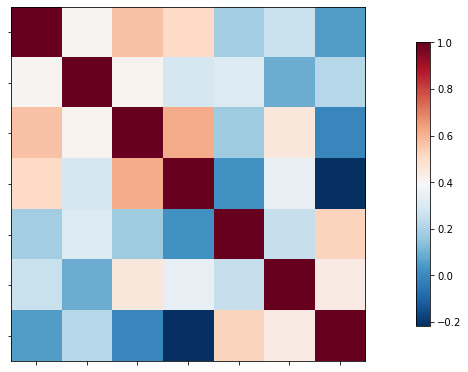

In [11]:
correlation_matrix = connectivity_data[0]
# Mask the main diagonal for visualization:
# np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix)

# Load data

In [8]:
#Load connectomes

#feat_file = '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/features_11Subs.npz'
feat_file = '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/all_features_47.npz'

connectivity_data = np.load(feat_file)['a']

# Extract specific connections

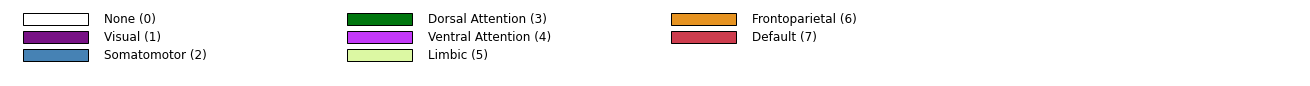

In [32]:
labels = hcp.parcellation_labels(hcp.yeo7)

In [9]:
connectivity_data[0][1,2]

0.4112723010007175

In [10]:
#Indicate only specific correlation (specific parcells) from the matrix- for each subject
specific_parcell_corr = []
#print(data[1])
for i in range(len(connectivity_data)):
    print(i)
    print (connectivity_data[i][5,0])
    specific_parcell_corr.append(connectivity_data[i][5,0])

0
0.2566775699492148
1
0.5349002416300955
2
0.6175115785833399
3
0.3205487930689081
4
0.5162582028425511
5
0.16935549259283397
6
0.2898080701537251
7
0.449034331359363
8
0.265347643014113
9
0.24776385068551712
10
0.540964177359438
11
0.3366100388718562
12
0.48004407443759994
13
0.5116853411034855
14
0.1447026271375868
15
0.3540745338999928
16
0.43123039655862866
17
0.4083650536608586
18
0.5725715713812075
19
0.43610411023765594
20
0.1851451499257826
21
0.20172320983987194
22
0.42848759608128667
23
0.3116000709967081
24
0.25170026575222676
25
0.13733089536069043
26
0.3566007413124003
27
-0.21497959433923422
28
0.40254890194831255
29
0.35578628519336797
30
0.34011792352782905
31
0.3299838896503055
32
0.1686373834385062
33
0.6794247853716056
34
0.4346836492049146
35
0.10323841496085791
36
0.4966721400212621
37
0.45835186083532864
38
0.5036596195004632
39
0.4460690225719916
40
0.48860561147669507
41
0.2344323656094635
42
0.3965992107355008
43
0.5712190226076262
44
0.36946202891011604
45
0.

# Parcellation - full 

In [ ]:
hcp.mesh.keys()

In [ ]:
plotting.view_surf(hcp.mesh.inflated, hcp.cortex_data(Xn[29]), 
    threshold=1.5, bg_map=hcp.mesh.sulc)

In [ ]:
#parcellation for one subject
Xp = hcp.parcellate(data[0], hcp.yeo7)

In [ ]:
hcp.yeo7

In [ ]:
schafer_parcel = nilearn.datasets.fetch_atlas_schaefer_2018(n_rois=400, yeo_networks=7, resolution_mm=1, data_dir=None, base_url=None, resume=True, verbose=1)

In [ ]:
type(schafer_parcel)

In [ ]:
#parcell each subject according to schafer_2018

In [ ]:
#Parcellate time series for each subject
parcellated_data = []
#print(data[1])
for i in range(len(data)):
    print(i)
    print (data[i])
    parcellated_data.append(hcp.parcellate(data[i], hcp.yeo7))

In [ ]:
len(parcellated_data)

In [ ]:
parcellated_data[0].shape

In [ ]:
df = hcp.ranking(parcellated_data[0][300], hcp.yeo7)
df

In [ ]:
labels = hcp.parcellation_labels(hcp.yeo7)

# Connectivy matrix - full

In [ ]:
#Create the wanted connectivity matrix
from nilearn import connectome
#kind{“correlation”, “partial correlation”, “tangent”, “covariance”, “precision”}
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
correlation_measure

In [ ]:
#Create connectivity matrix for each subject
connectivity_data = []
#print(data[1])
for i in range(len(parcellated_data)):
    print(i)
    print (data[i])
    connectivity_data.append(correlation_measure.fit_transform([parcellated_data[i]]))

In [ ]:
connectivity_data[1].shape

In [ ]:
correlation_matrix = connectivity_data[1][0]
# Mask the main diagonal for visualization:
# np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix)

In [ ]:
connectivity_data[2][0][6,1]

In [ ]:
#Indicate only specific correlation (specific parcells) from the matrix- for each subject
specific_parcell_corr = []
#print(data[1])
for i in range(len(connectivity_data)):
    print(i)
    print (connectivity_data[i][0][6,1])
    specific_parcell_corr.append(connectivity_data[i][0][6,1])

In [ ]:
specific_parcell_corr

In [ ]:
#Reduce to half of the matrix and discrad diagonal
vectorized_correlation = connectome.ConnectivityMeasure(kind='correlation',
                                                        vectorize=True, discard_diagonal=True)
clean_vectorized_correlation = vectorized_correlation.fit_transform([correlation_matrix])[0]
clean_vectorized_correlation.shape  # num_nodes*(num_nodes-1)/2

In [ ]:
len(connectivity_data)

In [ ]:
#Reduce to half of the matrix and discrad diagonal - for each subject
clean_connectivity_data = []
#print(data[1])
for i in range(len(connectivity_data)):
    print(i)
    print (connectivity_data[i])
    clean_connectivity_data.append(vectorized_correlation.fit_transform([connectivity_data[i][0]])[0])

In [ ]:
len(clean_connectivity_data)

In [ ]:
clean_connectivity_data[1].shape

# Save and load data

In [ ]:
#Save the data to disk
np.savez_compressed('features_11Subs',a = clean_connectivity_data)

In [ ]:
#Load data
feat_file = 'features_11Subs.npz'
X_features = np.load(feat_file)['a']

In [ ]:
X_features.shape

In [ ]:
view = plotting.view_connectome(correlation_matrix, node_coords = coords_forPlot)
view

# Load behavioral data

In [11]:
behavior = pd.read_csv("/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/HCP_behavioralData.csv")

In [14]:
#subject IDs of the connectome data 
with open('subID_47.txt', 'r') as f:
    subjects_num = json.loads(f.read())
    
subjects_num

['100307',
 '100408',
 '101107',
 '101309',
 '101915',
 '103111',
 '103414',
 '103818',
 '105014',
 '105115',
 '106016',
 '108828',
 '110411',
 '111312',
 '111716',
 '113619',
 '113922',
 '114419',
 '116524',
 '117122',
 '118528',
 '118730',
 '118932',
 '122317',
 '122620',
 '123117',
 '123925',
 '124422',
 '125525',
 '126325',
 '127630',
 '127933',
 '128127',
 '128632',
 '129028',
 '130013',
 '130316',
 '131217',
 '131722',
 '133019',
 '133928',
 '135225',
 '135932',
 '136833',
 '138534',
 '139637',
 '140925']

In [15]:
len(subjects_num)

47

In [16]:
#Take only the connectome subjects from the behavior data
behavior_clean = behavior.loc[behavior['Subject'].isin(subjects_num)]
behavior_clean.shape

(47, 582)

In [17]:
Flank_score = behavior_clean['Flanker_AgeAdj']

In [28]:
Flank_score

2      101.90
3      113.51
6       96.19
8      103.37
11      89.10
20      94.84
22      91.22
24      92.26
29      86.06
30      97.76
34     106.40
51      96.53
56     111.35
60     106.47
63      91.15
72      96.61
74     101.84
78      92.83
91     100.75
94     103.89
101    103.98
102     99.78
104    102.39
122     97.24
125    103.91
127    108.92
132    113.86
135    101.84
140     95.46
141    113.19
147    112.58
150    100.65
152    107.17
154     99.38
156     92.99
163    100.65
165    108.23
172    112.10
175     95.92
181    104.87
186     98.49
195    109.45
200    109.05
207    103.31
218    108.15
222    100.58
229     94.55
Name: Flanker_AgeAdj, dtype: float64

# Examine link between specific cortical connection and behavior

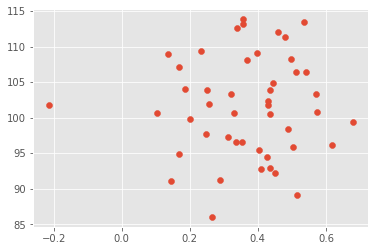

<AxesSubplot:ylabel='Flanker_AgeAdj'>

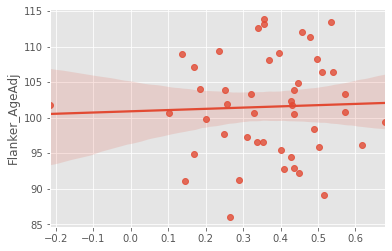

In [18]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = specific_parcell_corr
y = Flank_score

plt.scatter(x, y)
plt.show()

sns.regplot(x, y)

In [19]:
import scipy as sc
from scipy import stats

sc.stats.pearsonr(x, y)

(0.03954774927945746, 0.7918352803834595)